In [1]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [2]:
logv.ips <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/ips_pheno.txt", sep = "\t", row.names = 1,header = 1)
logv.mesendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/mesendo_pheno.txt", sep = "\t", row.names = 1,header = 1)
logv.defendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logvariance/defendo_pheno.txt", sep = "\t", row.names = 1,header = 1)

In [3]:
v.ips <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/ips_pheno.txt", sep = "\t", row.names = 1,header = 1)
v.mesendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/mesendo_pheno.txt", sep = "\t", row.names = 1,header = 1)
v.defendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/variance/defendo_pheno.txt", sep = "\t", row.names = 1,header = 1)

In [4]:
logm.ips <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logmean/ips_pheno.txt", sep = "\t", row.names = 1,header = 1)
logm.mesendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logmean/mesendo_pheno.txt", sep = "\t", row.names = 1,header = 1)
logm.defendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/logmean/defendo_pheno.txt", sep = "\t", row.names = 1,header = 1)

In [5]:
m.ips <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/variance/ips_pheno.txt", sep = "\t", row.names = 1,header = 1)
m.mesendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/variance/mesendo_pheno.txt", sep = "\t", row.names = 1,header = 1)
m.defendo <- read.table("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/mean/variance/defendo_pheno.txt", sep = "\t", row.names = 1,header = 1)

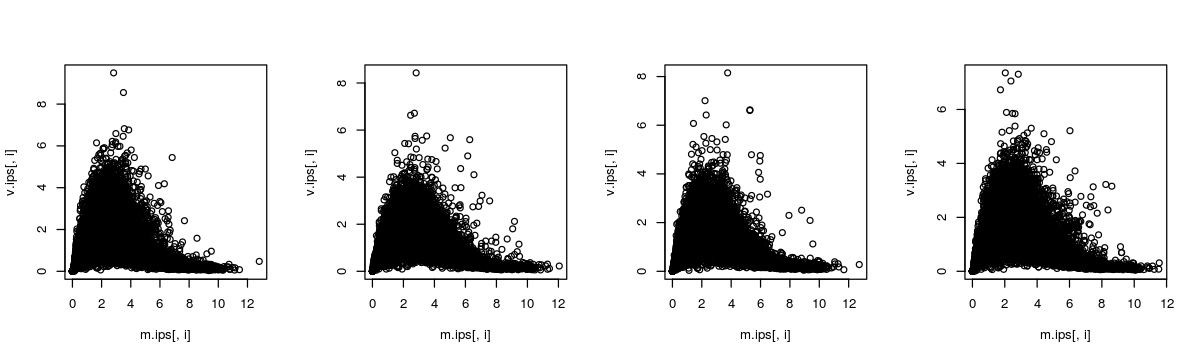

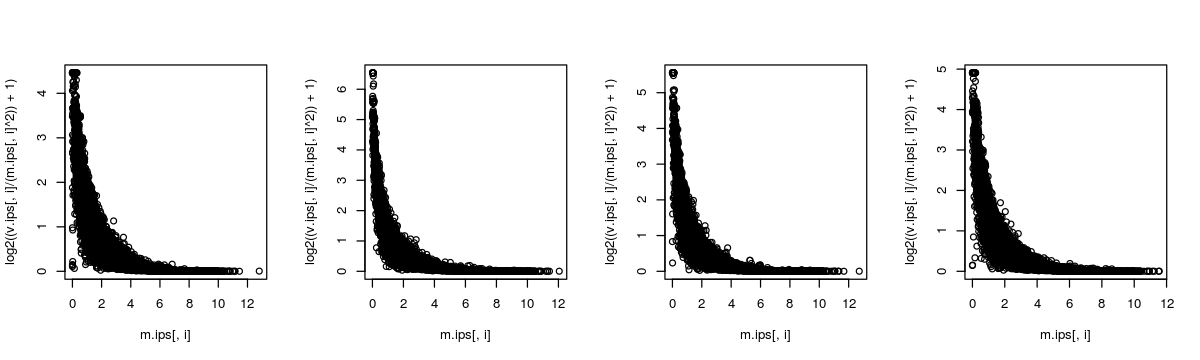

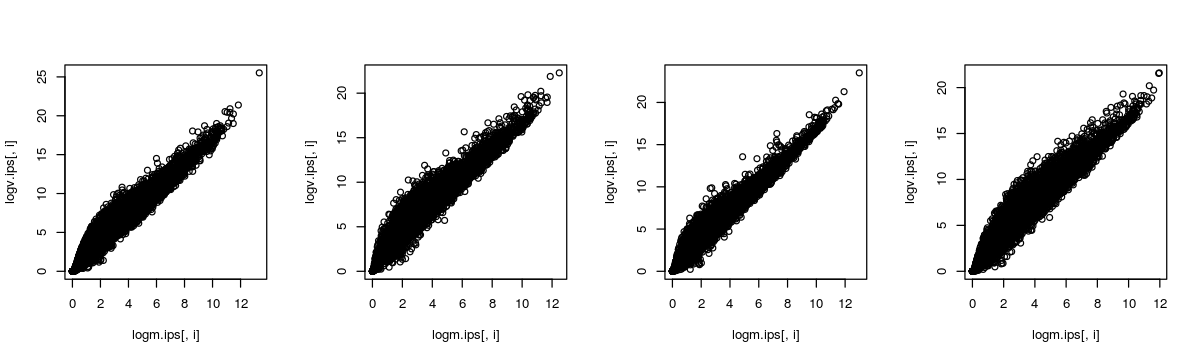

In [15]:
par(mfrow=c(1,4)) # four plots per line
options(repr.plot.width = 10, repr.plot.height = 3)
for (i in 1:4){
    plot(m.ips[,i],v.ips[,i])
}
for (i in 1:4){
    plot(m.ips[,i],log2((v.ips[,i]/(m.ips[,i]**2))+1))
}
for (i in 1:4){
    plot(logm.ips[,i],logv.ips[,i])
}

In [24]:
cv2.ips <- v.ips/(m.ips**2+1e-5)
cv2.mesendo <- v.mesendo/(m.mesendo**2+1e-5)
cv2.defendo <- v.defendo/(m.defendo**2+1e-5)

In [26]:
min(cv2.ips)

[1] 0

In [28]:
write.table(cv2.ips,"/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/cv2/ips_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(cv2.mesendo,"/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/cv2/mesendo_pheno.txt", sep = "\t", quote = F, col.names = NA)
write.table(cv2.defendo,"/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/cv2/defendo_pheno.txt", sep = "\t", quote = F, col.names = NA)

In [27]:
cv2.ips.pcs = prcomp(t(cv2.ips))$x[,1:10]
cv2.mesendo.pcs = prcomp(t(cv2.mesendo))$x[,1:10]
cv2.defendo.pcs = prcomp(t(cv2.defendo))$x[,1:10]

In [29]:
write.table(cv2.ips.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/cv2/ips_covs.txt", sep = "\t", quote = F, col.names = NA)
write.table(cv2.mesendo.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/cv2/mesendo_covs.txt", sep = "\t", quote = F, col.names = NA)
write.table(cv2.defendo.pcs, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/variance/cv2/defendo_covs.txt", sep = "\t", quote = F, col.names = NA)

In [33]:
res.ips = cv2.ips
for (i in 1:ncol(cv2.ips)){
    res.ips[,i] = lm(cv2.ips[,i] ~ 1 + 1/m.ips[,i])$residuals
}

In [34]:
head(res.ips)

,heth_1.expt_12.day0,jogf_2.expt_12.day0,pelm_3.expt_12.day0,vass_1.expt_12.day0,wibj_2.expt_12.day0,zapk_3.expt_12.day0,oaqd_3.expt_18.day0,paab_4.expt_18.day0,sita_1.expt_18.day0,toss_3.expt_18.day0,⋯,pipw_5.expt_44.day0,qehq_3.expt_44.day0,toco_5.expt_44.day0,uilk_3.expt_44.day0,ciwj_2.expt_45.day0,hajc_1.expt_45.day0,hecn_3.expt_45.day0,kuco_1.expt_45.day0,liqa_1.expt_45.day0,tert_1.expt_45.day0
ENSG00000000003_TSPAN6,-1.1320705,-1.2736924,-1.1278432,-1.0603567,-0.95319330,-1.0798995,-1.4969572,-1.4081082,-1.5244199,-1.3305124,⋯,-1.0345717,-1.0091726,-0.9216347,-0.9357004,-1.28096582,-1.4737557,-1.585382,-1.3733479,-1.4224174,-1.4607224
ENSG00000000419_DPM1,-1.1359783,-1.2517346,-1.1297251,-1.0252566,-0.93699537,-1.0843166,-1.4972314,-1.4077548,-1.5375670,-1.3383481,⋯,-1.0286869,-1.0070611,-0.9189884,-0.9322371,-1.29820586,-1.4750380,-1.577031,-1.3752600,-1.4249381,-1.4652973
ENSG00000000457_SCYL3,0.2999891,0.2833913,0.7920679,1.0775338,2.42392989,1.3352920,2.2841794,1.5795751,1.2459571,2.5675662,⋯,0.2442174,0.4032953,0.6469396,0.9407560,0.08446375,0.3323592,-0.119573,0.3454077,0.2775205,0.2809534
ENSG00000000460_C1orf112,-0.9094365,-1.1170982,-1.0294670,-0.7466356,-0.80549822,-0.8959842,-1.3683833,-1.2559663,-1.3637783,-1.1259737,⋯,-0.9446156,-0.9407754,-0.8247038,-0.8442598,-1.18480810,-1.3770058,-1.456104,-1.2947886,-1.3195433,-1.2703898
ENSG00000001036_FUCA2,-1.0693394,-1.2525584,-1.1073642,-1.0126094,-0.94383665,-1.0399528,-1.4607404,-1.3808733,-1.4847449,-1.2730790,⋯,-1.0008980,-0.9838962,-0.8707040,-0.9056514,-1.27995568,-1.4607695,-1.555632,-1.3497905,-1.3962680,-1.4500966
ENSG00000001084_GCLC,-0.7339174,-0.9787244,-0.7139891,-0.5144832,-0.09082365,-0.7912192,-0.3516432,-0.3448676,-0.6838834,-0.5719625,⋯,-0.7650663,-0.6969844,-0.6131550,-0.6296158,-0.47357773,-0.9139638,-1.044760,-0.8611183,-0.8619878,-0.8806124


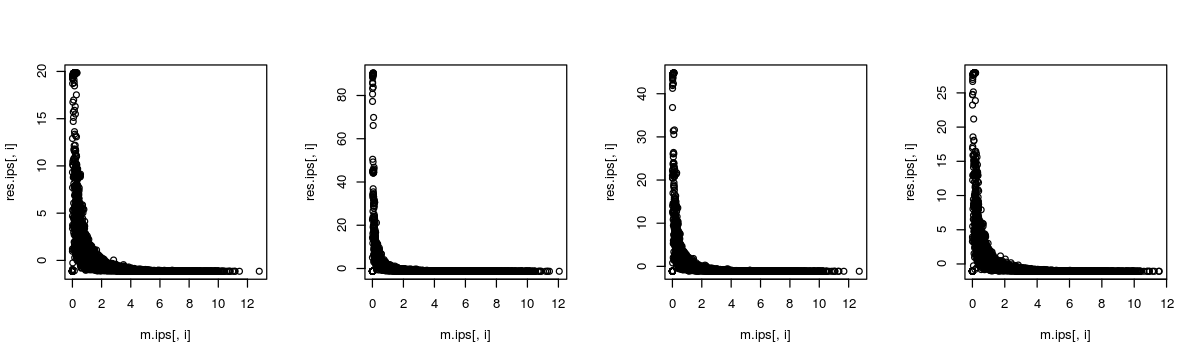

In [36]:
par(mfrow=c(1,4))
for (i in 1:4){
    plot(m.ips[,i],res.ips[,i])
}